In [1]:
from src.download import download_stock_data

In [10]:
path = download_stock_data('TSLA')

⏬ Downloading TSLA data from 2025-01-01 to 2025-05-02...
✅ Data saved at: data\TSLA.csv


In [31]:
from src.preprocess import preprocess_data

In [32]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(file_path):

    try:
        # Load the CSV file
        df = pd.read_csv(file_path)

        # Drop the first two rows if they contain metadata (like ticker info)
        # Check if the second row has a valid date or not
        try:
            pd.to_datetime(df.iloc[2, 0])  # Try converting the value at row 2, column 0 to a date
            df = df.iloc[2:].copy()  # Drop first two rows if valid date found
        except Exception:
            df = df.iloc[3:].copy()  # Drop first three rows if it's another kind of metadata

        # Rename 'Price' column to 'Date' if necessary
        if 'Price' in df.columns:
            df.rename(columns={'Price': 'Date'}, inplace=True)

        # Standardize column names and order
        expected_cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
        df = df[[col for col in expected_cols if col in df.columns]]  # Keep only these columns

        # Convert 'Date' to datetime and ensure numeric types for other columns
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Drop rows with any NaN values
        df.dropna(inplace=True)

        # Save the cleaned data to a new CSV file
        os.makedirs('data', exist_ok=True)
        clean_file_path = 'data/clean_data.csv'
        df.to_csv(clean_file_path, index=False)

        # Scale the numerical features (Open, High, Low, Close, Volume)
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

        print(f"✅ Cleaned data saved to {clean_file_path}")
        return df, clean_file_path, scaler, scaled_data

    except Exception as e:
        print(f"Error in preprocessing data: {str(e)}")
        return None, None, None, None

In [33]:
df, path,scaler,scaled_close = preprocess_data(path)


✅ Cleaned data saved to data/clean_data.csv


In [34]:
from src.visualize import *

c:\Project\StockPricePrediction\src\visualize.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\POOJA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


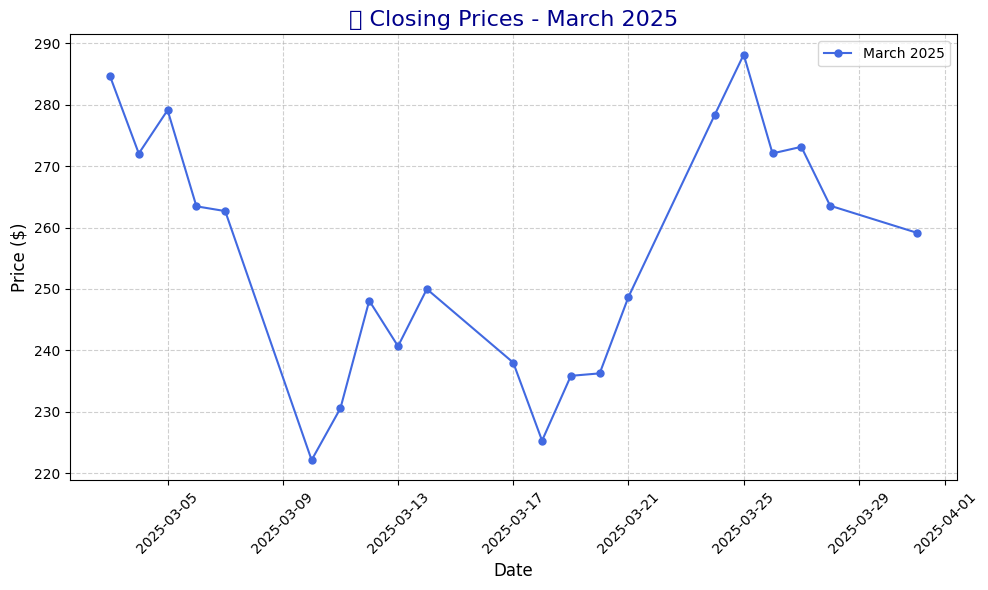

,Date,Close
0,2025-03-03,284.649994
1,2025-03-04,272.040009
2,2025-03-05,279.100006
3,2025-03-06,263.450012
4,2025-03-07,262.670013
5,2025-03-10,222.149994
6,2025-03-11,230.580002
7,2025-03-12,248.089996
8,2025-03-13,240.679993
9,2025-03-14,249.979996


In [35]:
visualize_monthly_data(df,selected_month="March")

In [41]:
from src.model import *

In [42]:
X,y = create_sequences(scaled_close)

In [44]:
model = build_model(X)

C:\Users\POOJA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
train_model(model,X,y)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0327 - val_loss: 0.0502
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0083 - val_loss: 0.0177
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.0183 - val_loss: 0.0142
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0155 - val_loss: 0.0222
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0106 - val_loss: 0.0326
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0061 - val_loss: 0.0421
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.0082 - val_loss: 0.0493
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 0.0103 - val_loss: 0.0530
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0099 - val_loss: 0.0535
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0077 - val_loss: 0.0517
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.0100 - val_loss:

(<Sequential name=sequential_3, built=True>,
 <keras.src.callbacks.history.History at 0x2e1b5971640>)

In [46]:
from src.predict import *

In [51]:
prediction = predict_next_days(model,scaled_close,scaler)

ValueError: non-broadcastable output operand with shape (7,1) doesn't match the broadcast shape (7,5)

c:\Project\StockPricePrediction\src\visualize.py:82: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\POOJA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


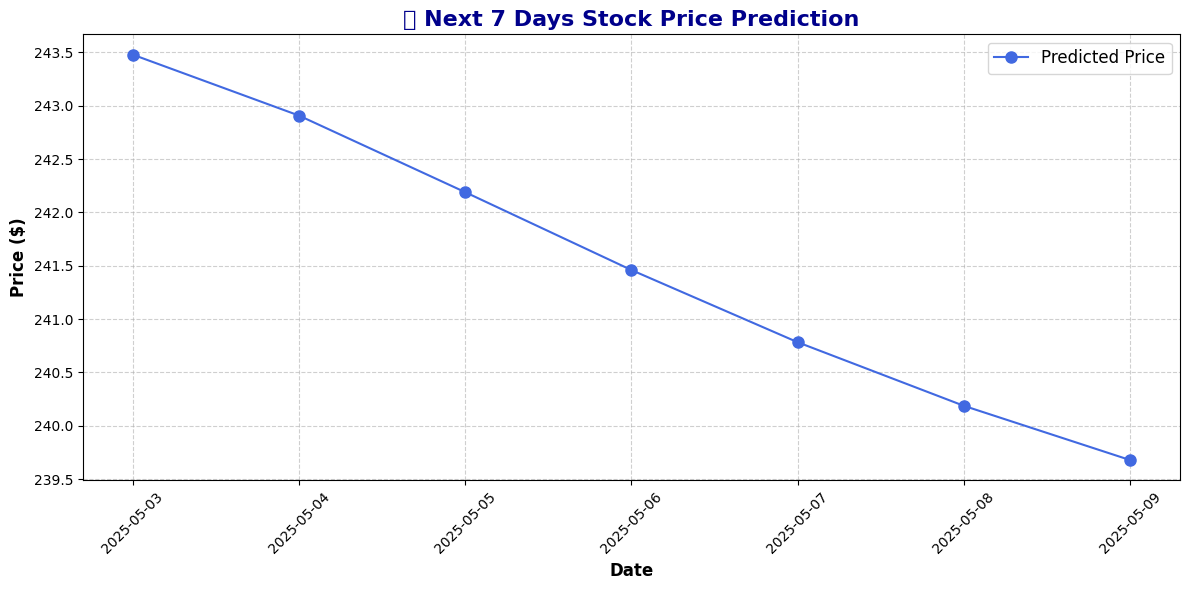

In [48]:
plot_predicted_prices(prediction)

In [49]:
suggest_buy_sell(prediction)


📊 Stock Prediction Summary & Recommendation
────────────────────────────────────────────
Day   Price ($)   Action    
────────────────────────────────────────────
Day 1   $243.48      Hold 🤝    
Day 2   $242.91      Sell 📉    
Day 3   $242.19      Sell 📉    
Day 4   $241.46      Sell 📉    
Day 5   $240.78      Sell 📉    
Day 6   $240.19      Sell 📉    
Day 7   $239.68      Sell 📉    
────────────────────────────────────────────
